## Decision Tree Algorithm

### Task 3: Create the Decision Tree classifier and visualize it graphically.

### Created By Pooja Patel

## 1. Importing necessary Libaries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading the data from csv file
df=pd.read_csv('datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking if there is any null values in dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Here, there is no null values persent in the dataset, So **data cleaning is not required.**

### Lets look at statistical summary and other information about student dataset.

In [4]:
# Statistical summary of dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## 2. Data Visualization

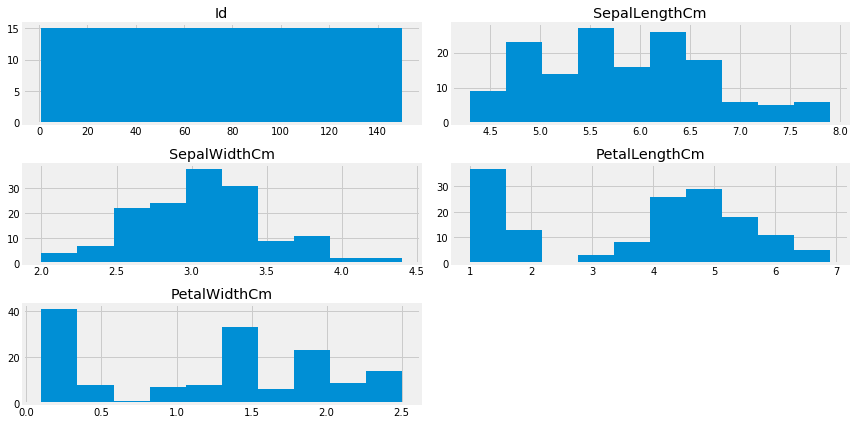

In [6]:
# Creating a histogram of the dataset
df.hist(figsize=(12,6));
plt.tight_layout()

### Preparing the data

In [7]:
# Extracting Independent and dependent Variable  
X=df.drop(['Id','Species'],axis=1)
y=df['Species'].values

In [8]:
# Splitting the dataset into training and test set.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Normalize the data

In [9]:
# Scaling the data So, it will not give higher priority to higher values)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## 3. Training the Algorithm

In [10]:
# Defining the decision tree algorithm 
DT_classifer=DecisionTreeClassifier(criterion='gini')
# Fitting the training dataset of Decison tree classifer 
DT_classifer.fit(X_train,y_train)
print('Training complete.')

Training complete.


## 4. Making Prediction

In [11]:
# Predicting the test set result  
y_pred=DT_classifer.predict(X_test)

### Predicting a species using a new unseen data 

In [12]:
'''
SepalLengthCm= 4.8
SepalWidthCm= 3.3
PetalLengthCm= 1.2
PetalWidthCm= 1.5
'''

new_data= scaler.transform(np.array([[4.8,3.3,1.2,1.5]]))
new_pred=DT_classifer.predict(new_data)  
new_pred

array(['Iris-setosa'], dtype=object)

In [13]:
print("If SepalLength(Cm)= 4.8, SepalWidth(Cm)= 3.3, PetalLength(Cm)= 1.2, PetalWidth(Cm)= 1.5 then the predicted species is:",new_pred[0])

If SepalLength(Cm)= 4.8, SepalWidth(Cm)= 3.3, PetalLength(Cm)= 1.2, PetalWidth(Cm)= 1.5 then the predicted species is : Iris-setosa


## 5. Evaluating the model

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [15]:
# Evaluating the Decision tree model using classification report, confustion matrix and accuary score
print("classification_report : \n",classification_report(y_test,y_pred))
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred))

classification_report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

confusion_matrix : 
 [[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


In [16]:
# model accuracy
print(accuracy_score(y_test,y_pred))

0.96


## 6. Ploting a Decision Tree

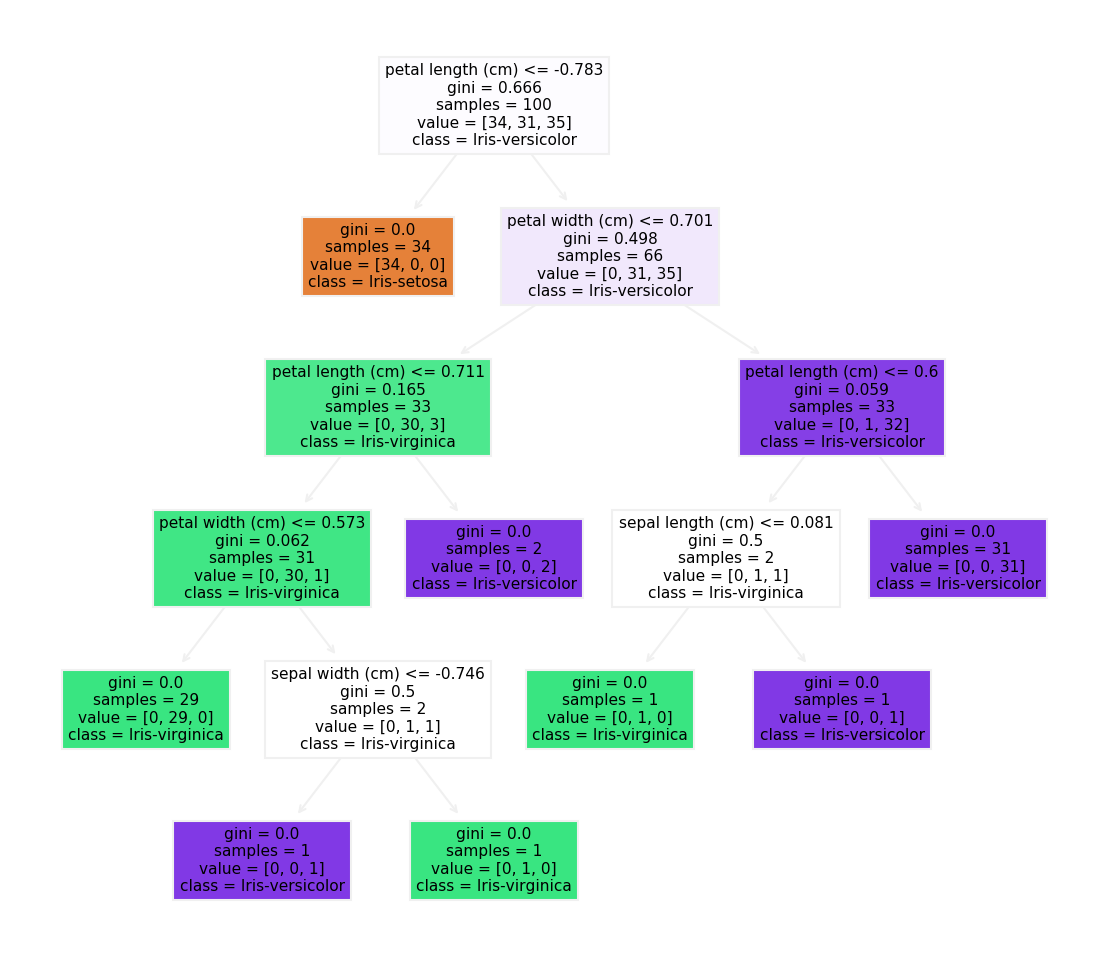

In [17]:
# Ploting a decision tree
feat_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cls_name=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
fig, axes = plt.subplots(figsize = (4,4), dpi=300,ncols=1,nrows=1)
tree.plot_tree(DT_classifer,
               feature_names = feat_names, 
               class_names=cls_name,
               filled = True);
fig.savefig('iris_decision_tree.png')